# One Dimensional Plots

#### Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#### Constants

In [7]:
DATA_FOLDER = 'data/'

In [8]:
# Text file as column of numbers
df1 = np.loadtxt(DATA_FOLDER + 'example_1.txt')
df2 = np.loadtxt(DATA_FOLDER + 'example_2.txt')

## 1. Histograms

#### Basic Hist

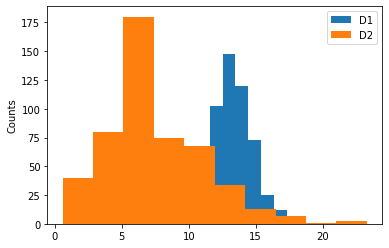

In [11]:
plt.hist(df1, label='D1')
plt.hist(df2, label='D2')
plt.legend()
plt.ylabel('Counts')
plt.show()

#### Several issues including:
- Different bin sizes
- No legend
- No labels

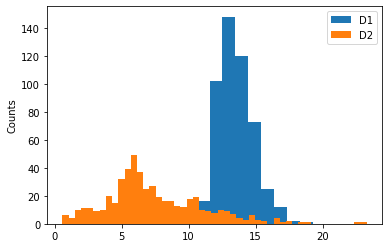

In [19]:
bins = np.linspace(min(df1.min(), df2.min()), max(df1.max(), df2.max()), 50)
counts1, _, _ = plt.hist(df1, bins=10, label='D1')
plt.hist(df2, bins=bins, label='D2')
plt.legend()
plt.ylabel('Counts');

#### Much better, but what if we want probability? 

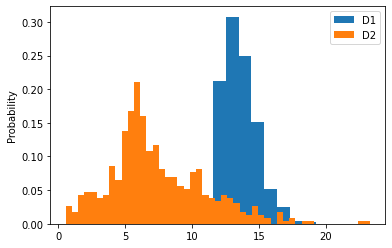

In [22]:
bins = np.linspace(min(df1.min(), df2.min()), max(df1.max(), df2.max()), 50)
counts1, _, _ = plt.hist(df1, bins=10, label='D1', density=True)
plt.hist(df2, bins=bins, label='D2', density=True)
plt.legend()
plt.ylabel('Probability');

#### Add transparency

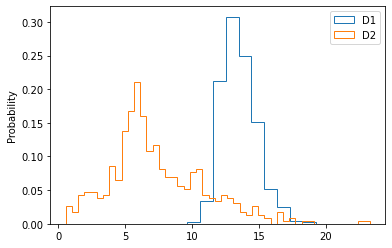

In [27]:
bins = np.linspace(min(df1.min(), df2.min()), max(df1.max(), df2.max()), 50)
counts1, _, _ = plt.hist(df1, bins=10, label='D1', density=True, histtype='step', lw=1)
plt.hist(df2, bins=bins, label='D2', density=True, histtype='step', lw=1)
plt.legend()
plt.ylabel('Probability');

#### Stack

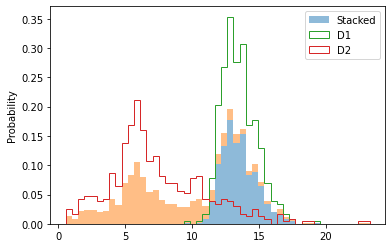

In [32]:
bins = np.linspace(min(df1.min(), df2.min()), max(df1.max(), df2.max()), 50)
plt.hist([df1, df2], bins=bins, label='Stacked', density=True, histtype='barstacked', alpha=0.5)
plt.hist(df1, bins=bins, label='D1', density=True, histtype='step', lw=1)
plt.hist(df2, bins=bins, label='D2', density=True, histtype='step', lw=1)
plt.legend()
plt.ylabel('Probability');

#### That is actually pretty bad!

#### Use `density` to determine bins

## 2. Bee Swarm Plots

#### Basic Plot

In [34]:
# Format data to put into 1 dataframe instead of 2 numpy arrays
dataset = pd.DataFrame({
    "value": np.concatenate((df1, df2)),
    "type": np.concatenate((np.ones(df1.shape), np.zeros(df2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='value'>

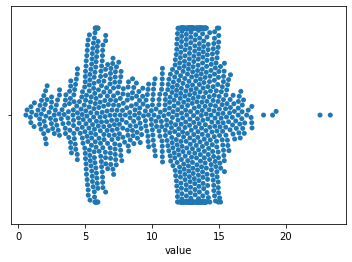

In [38]:
sb.swarmplot(dataset["value"])

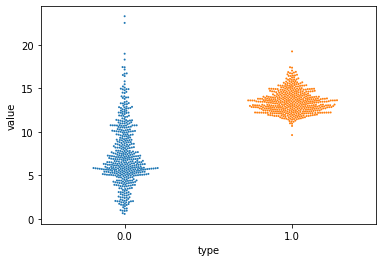

In [40]:
sb.swarmplot(data=dataset, x='type', y='value', size=2);

# 3. Box Plots

<AxesSubplot:xlabel='type', ylabel='value'>

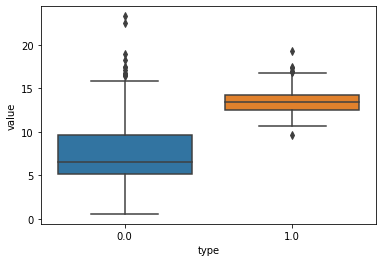

In [41]:
sb.boxplot(x='type', y='value', data=dataset)

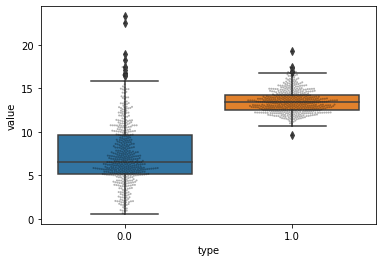

In [43]:
sb.boxplot(x='type', y='value', data=dataset)
sb.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

In [44]:
# Seaborn automatically calls out outliers
# 1.5 Inter Quartile Distance by default

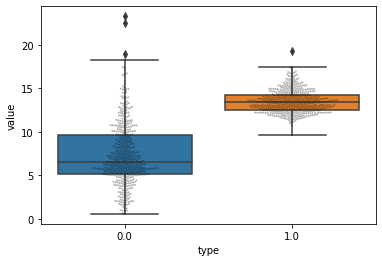

In [47]:
sb.boxplot(x='type', y='value', data=dataset, whis=2.0)
sb.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

# 4. Violin Plots

#### Overlay swarm on vioin

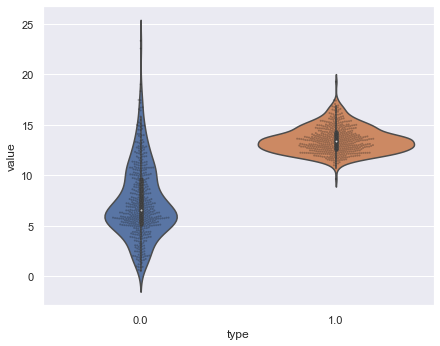

In [61]:
sb.set(rc={'figure.figsize':(7.0,5.5)})
sb.violinplot(x='type', y='value', data=dataset)
sb.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

#### Add quartiles

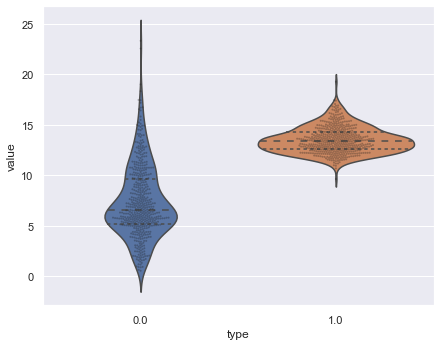

In [63]:
sb.violinplot(x='type', y='value', data=dataset, inner='quartile')
sb.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

#### Reduce smoothing

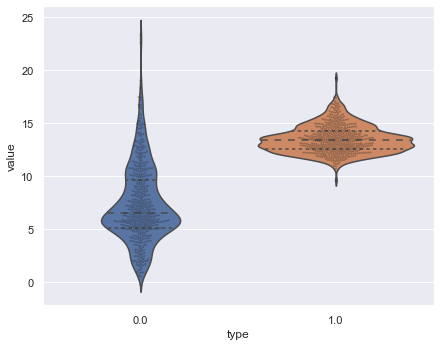

In [64]:
sb.violinplot(x='type', y='value', data=dataset, inner='quartile', bw=0.2)
sb.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

# 5. Emperical Cumulative Distribution Functions

- Motivation: Bins in hist can look noisy, so hard to know how much to bin data by
- Have we overbiined? Underbinned?
- ECDF is hist without bins kind of, but hard for humans to read / easy for computers
- Instead of 25%/50%/75% quartiles, you can define the incremnts
- Requires sorting the data ascending

In [65]:
sd1 = np.sort(df1)
sd2 = np.sort(df2)

In [69]:
# 1/df1.size as 0, 1 would not be quite 100 percentile points
cdf = np.linspace(1/df1.size, 1, df1.size)

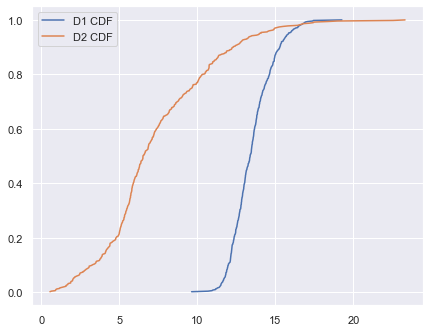

In [70]:
plt.plot(sd1, cdf, label="D1 CDF")
plt.plot(sd2, cdf, label="D2 CDF")
plt.legend();

#### Add a histogram

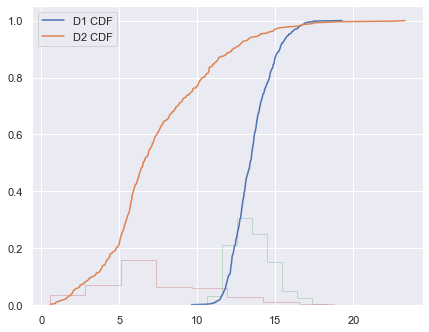

In [71]:
plt.plot(sd1, cdf, label="D1 CDF")
plt.plot(sd2, cdf, label="D2 CDF")
plt.hist(df1, histtype="step", density=True, alpha=0.3)
plt.hist(df2, histtype="step", density=True, alpha=0.3)
plt.legend();

### Pandas Describe

In [72]:
df = pd.DataFrame({"Data1": df1, "Data2": df2})

In [73]:
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
